In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import FancyArrowPatch
import numpy as np
import IPython.display as ipd

from helpers_adaptivefilters import *
from helpers_miscellaneous import *

# Basic Tools

## Simulated Data

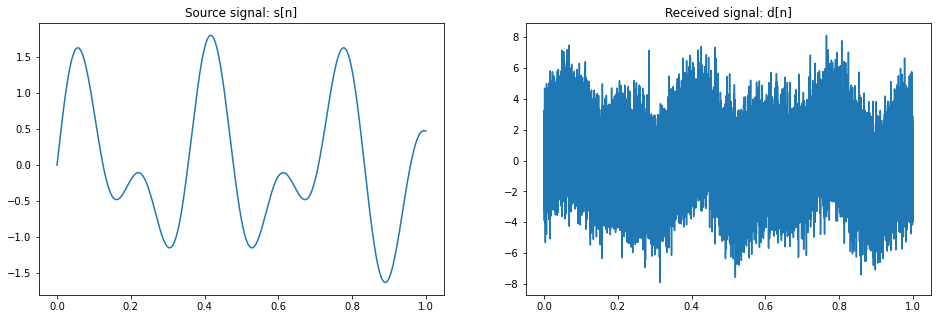

In [15]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))

### 1. LMS

Converged Point: 	 0.05045351473922902 sec
Max Misadjustment: 	 0.13451964056113522


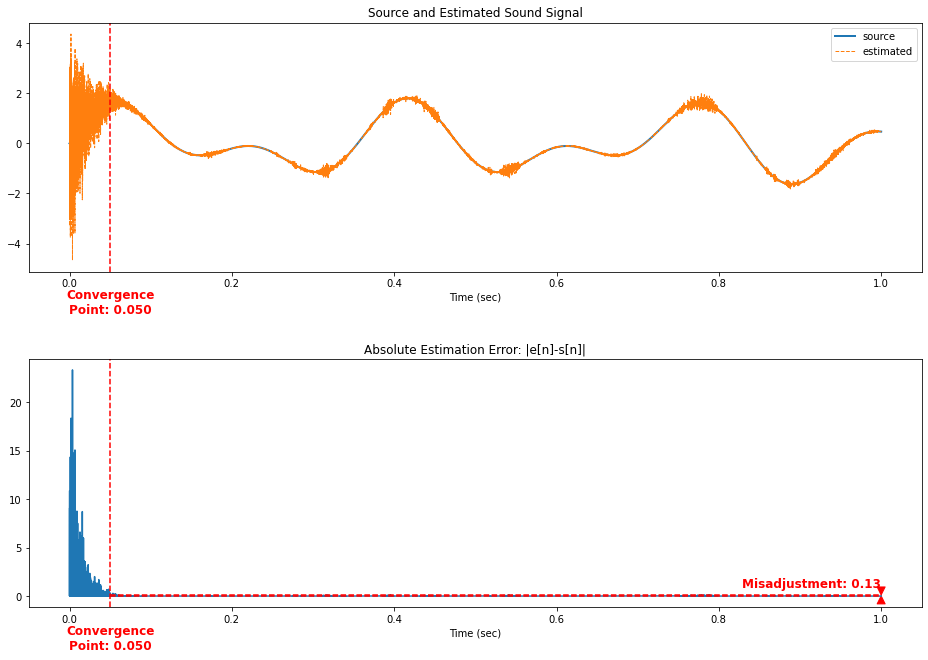

In [16]:
e = sb_lms(x, d, mu=0.001, K=5)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=True, savedfname="../figures/StandardLMS")

Not Converged!
Converged Point: 	 0.02528344671201814 sec
Max Misadjustment: 	 0.2874592377568526
Converged Point: 	 0.02798185941043084 sec
Max Misadjustment: 	 1.541267325111336
Converged Point: 	 0.011383219954648527 sec
Max Misadjustment: 	 17.944567096815355


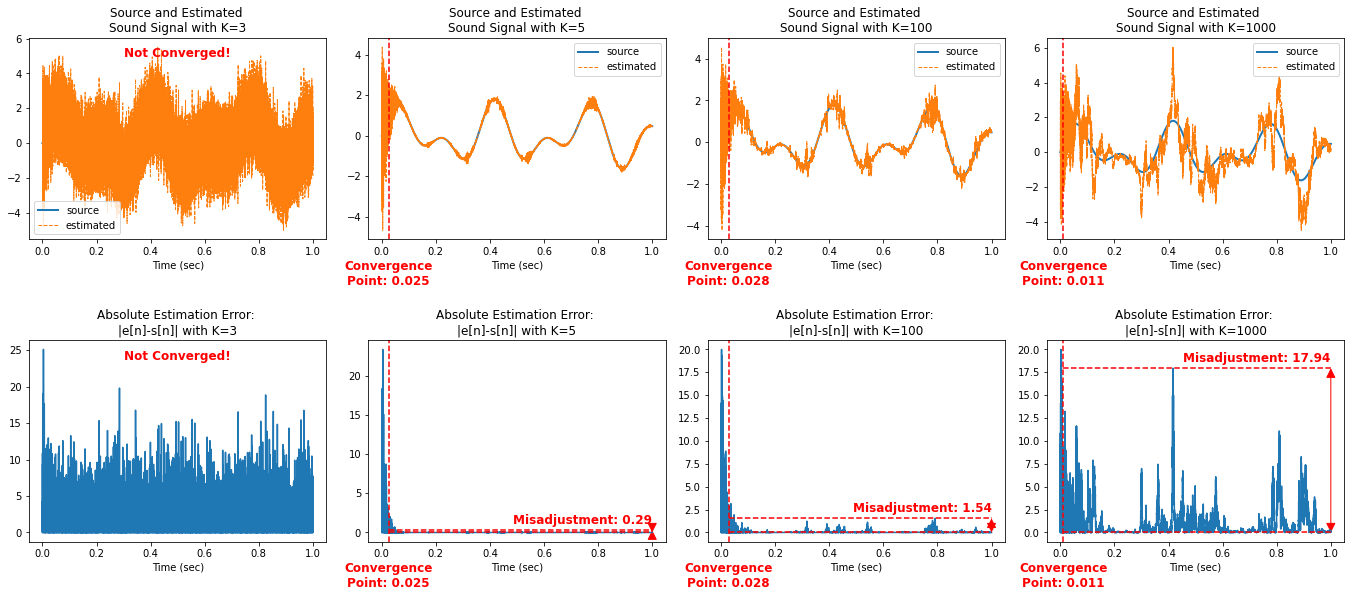

In [23]:
Ks = [3, 5, 100, 1000]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, Ks=Ks, conv_div=10, save=True, savedfname="../figures/StandardLMSvsKs")

Converged Point: 	 0.38346938775510203 sec
Max Misadjustment: 	 0.04740929253992763
Converged Point: 	 0.05045351473922902 sec
Max Misadjustment: 	 0.13451964056113522
Converged Point: 	 0.0074603174603174605 sec
Max Misadjustment: 	 2.8419445853958174
Converged Point: 	 0.005918367346938775 sec
Max Misadjustment: 	 4.986783196276515


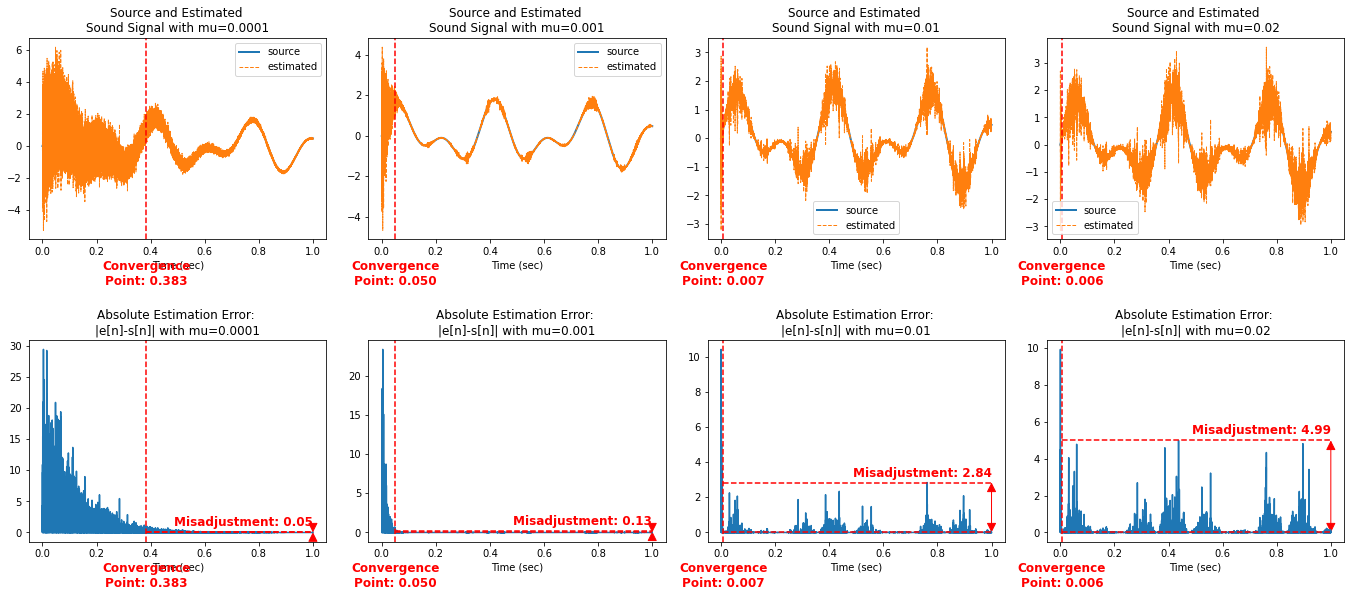

In [22]:
mus = [1e-4, 1e-3, 1e-2, 2e-2]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, mus=mus, conv_div=50, save=True, savedfname="../figures/StandardLMSvsmus")

Progress: 100%|█████████████████████████████████| 30/30 [00:45<00:00,  1.51s/it]


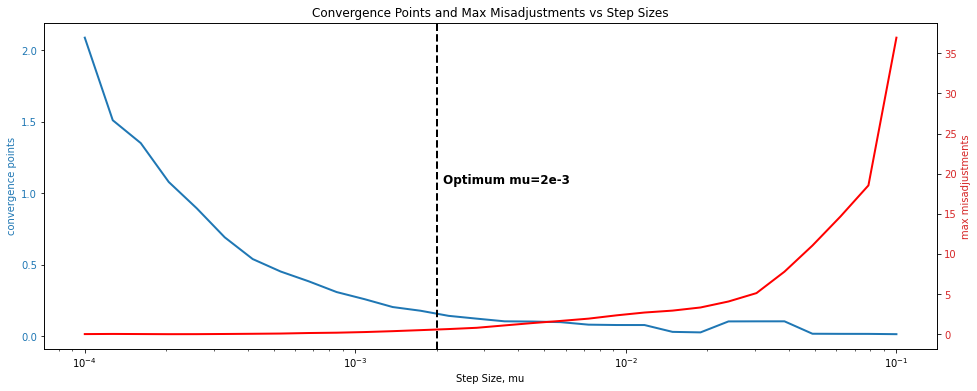

In [24]:
from helpers_miscellaneous import compare_with_params
mus = np.logspace(-4,-1,30)
T = 10
f = 3
fs = 8000
compare_with_params(f, T, fs, mus=mus, save=True, savedfname="../figures/ChoosingMu")

Progress: 100%|█████████████████████████████████| 45/45 [00:20<00:00,  2.19it/s]


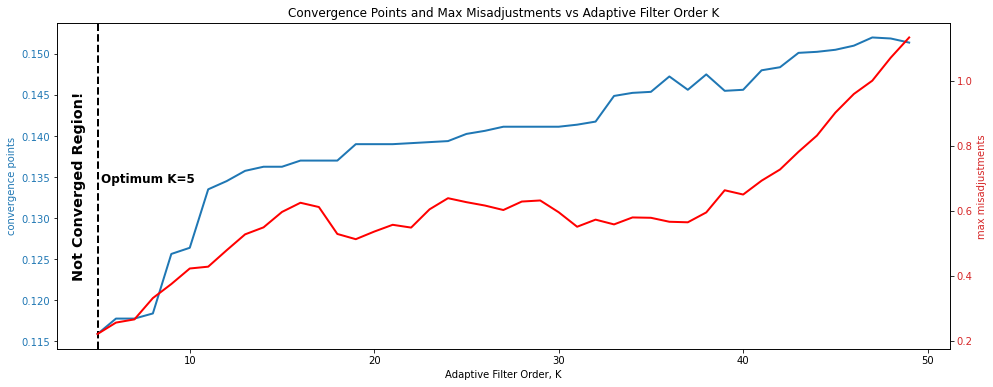

In [25]:
from helpers_miscellaneous import compare_with_params
Ks = np.arange(5,50,1)
T = 3
f = 3
fs = 8000
compare_with_params(f, T, fs, Ks=Ks, save=True, savedfname="../figures/ChoosingK")

### 2. Normalized LMS

Converged Point: 	 0.02040816326530612 sec
Max Misadjustment: 	 0.7780950912341228


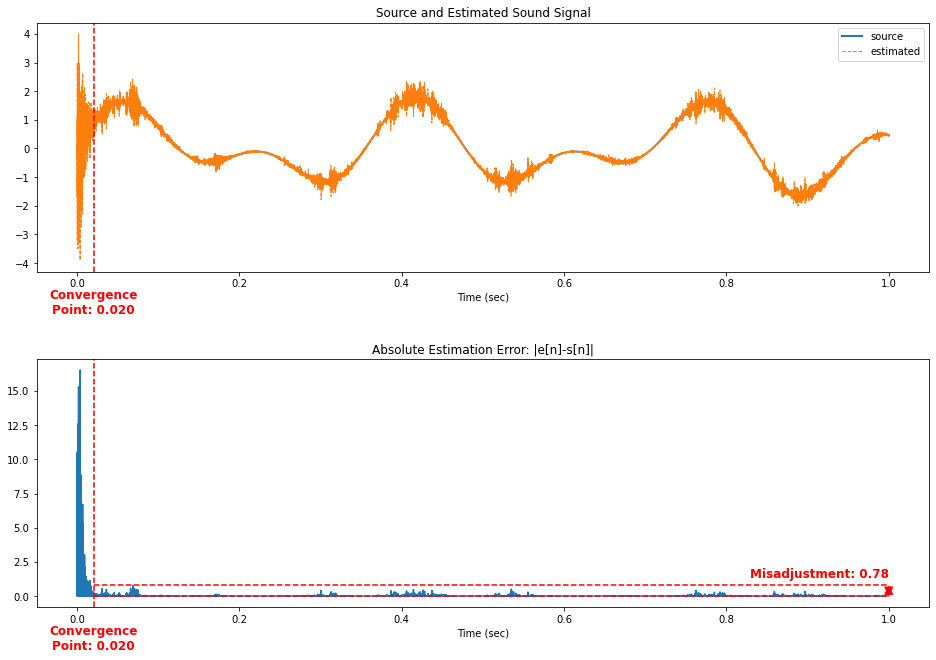

In [26]:
e = sb_lms(x, d, mu=0.012, K=5, normalized=True)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=True, savedfname="../figures/NLMS")

Converged Point: 	 0.02365079365079365 sec
Converged Point: 	 0.01868480725623583 sec
Max Misadjustment: 	 2.44123665958174
Max Misadjustment: 	 2.050277633066778


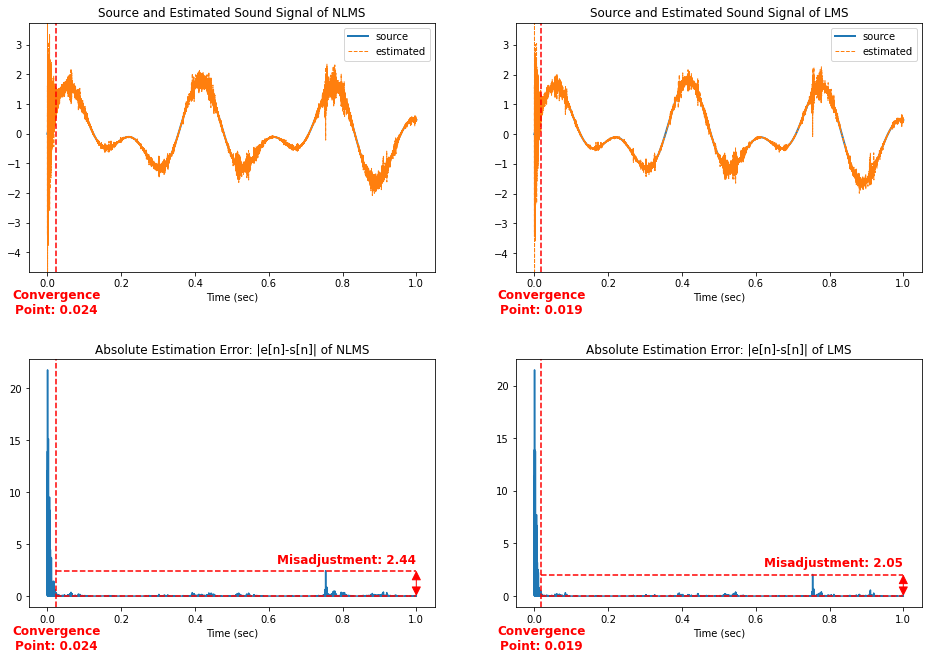

In [37]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_NLMS = sb_lms(x, d, mu=0.01, K=5, normalized=True)
e_LMS = sb_lms(x, d, mu=0.0025, K=5, normalized=False)
plot2methods(t, e_NLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="NLMS", method_name2="LMS", save=True, savedfname="../figures/ComparisonNLMSvsLMS")

### 3. Sign LMS

Converged Point: 	 0.11723356009070295 sec
Max Misadjustment: 	 1.2448191403906608


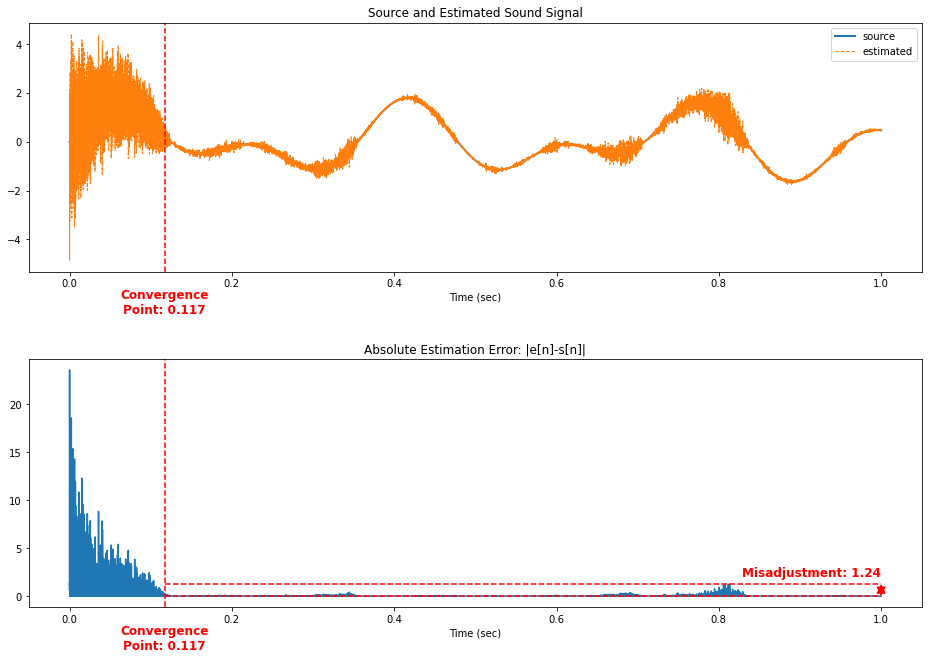

In [30]:
e = sb_lms(x, d, mu=0.001, K=5, type="sign-error")
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=True, savedfname="../figures/SignerrorLMS")

Converged Point: 	 0.11342403628117914 sec
Converged Point: 	 0.024467120181405896 sec
Max Misadjustment: 	 1.1215550530179543
Max Misadjustment: 	 0.6507605361414119


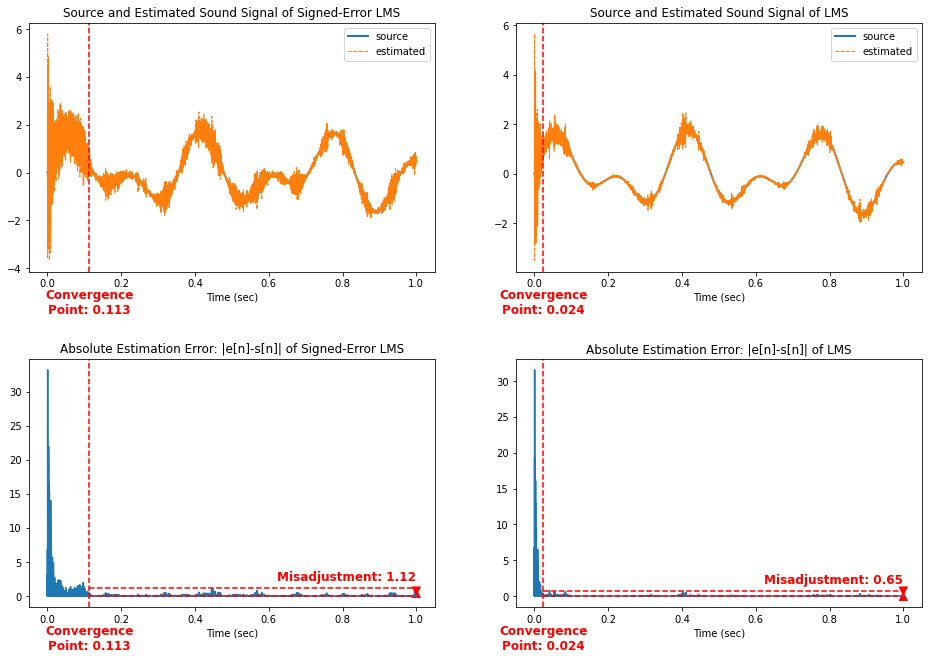

In [39]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_SELMS = sb_lms(x, d, mu=0.002, K=5, normalized=False, type="sign-error")
e_LMS = sb_lms(x, d, mu=0.002, K=5, normalized=False)
plot2methods(t, e_SELMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Signed-Error LMS", method_name2="LMS", save=True, savedfname="../figures/ComparisonSELMSvsLMS", ylim=False)

Converged Point: 	 0.051950113378684805 sec
Converged Point: 	 0.019229024943310656 sec
Max Misadjustment: 	 0.4909751240650324
Max Misadjustment: 	 0.9327938833505196


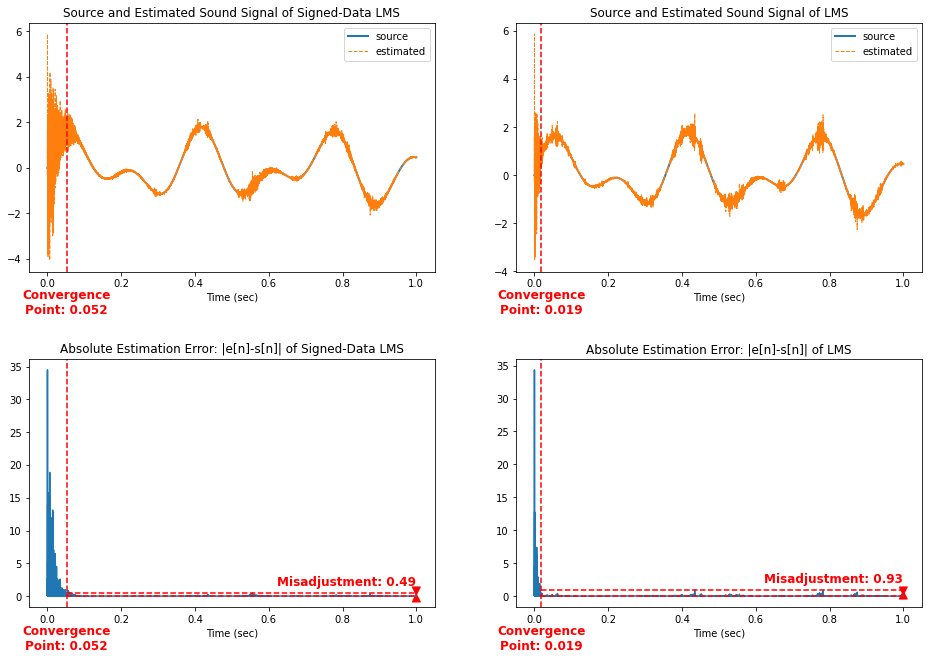

In [42]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_SDLMS = sb_lms(x, d, mu=0.001, K=5, normalized=False, type="sign-data")
e_LMS = sb_lms(x, d, mu=0.0025, K=5, normalized=False)
plot2methods(t, e_SDLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Signed-Data LMS", method_name2="LMS", save=True, savedfname="../figures/ComparisonSDLMSvsLMS", ylim=False)

Converged Point: 	 0.12065759637188209 sec
Converged Point: 	 0.017891156462585035 sec
Max Misadjustment: 	 0.667544819458073
Max Misadjustment: 	 0.690884991554496


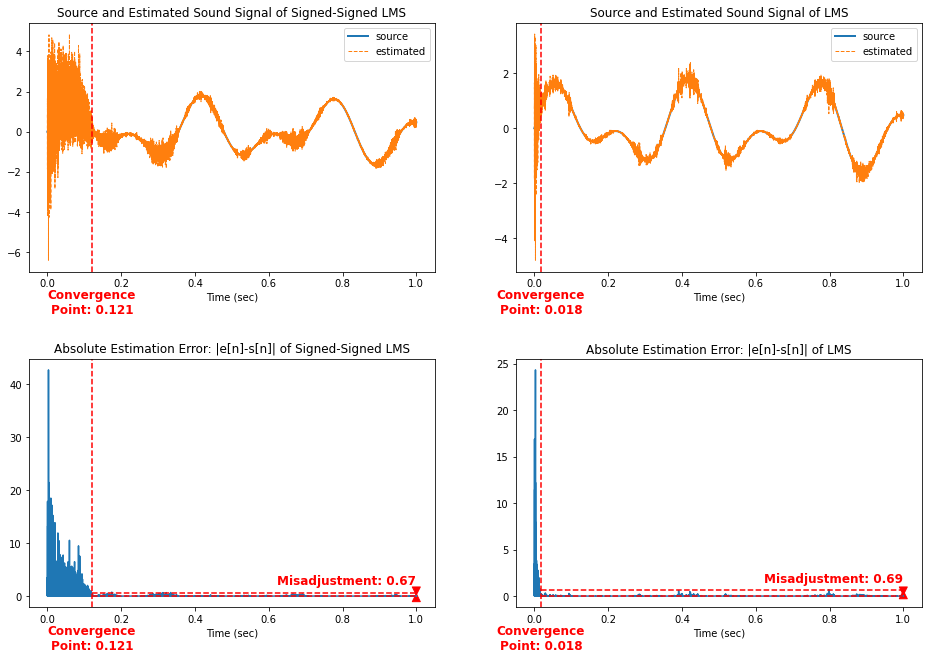

In [46]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_SSLMS = sb_lms(x, d, mu=0.001, K=5, normalized=False, type="sign-sign")
e_LMS = sb_lms(x, d, mu=0.0025, K=5, normalized=False)
plot2methods(t, e_SSLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Signed-Signed LMS", method_name2="LMS", save=True, savedfname="../figures/ComparisonSSLMSvsLMS", ylim=False)

Converged Point: 	 0.14412698412698413 sec
Converged Point: 	 0.020816326530612245 sec
Max Misadjustment: 	 0.6811026230899905
Max Misadjustment: 	 0.7251880599583884


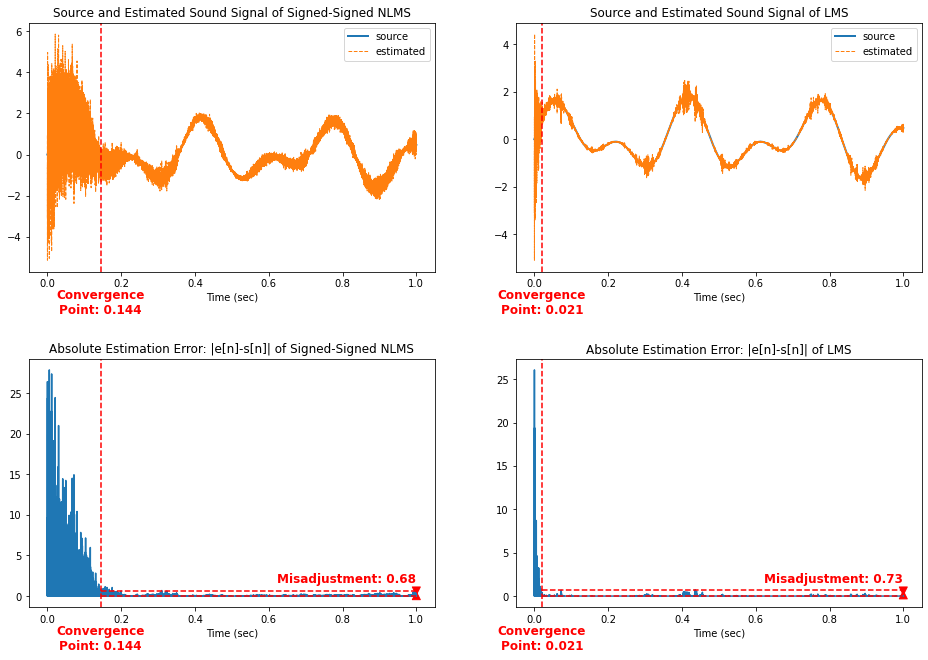

In [52]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_SSNLMS = sb_lms(x, d, mu=0.002, K=5, normalized=True, type="sign-sign")
e_LMS = sb_lms(x, d, mu=0.0025, K=5, normalized=False)
plot2methods(t, e_SSNLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Signed-Signed NLMS", method_name2="LMS", save=True, savedfname="../figures/ComparisonSSNLMSvsLMS", ylim=False)

Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 73109.33it/s]


Converged Point: 	 0.027165532879818596 sec
Converged Point: 	 0.02090702947845805 sec
Max Misadjustment: 	 0.38948221766490726
Max Misadjustment: 	 0.4917146913834993


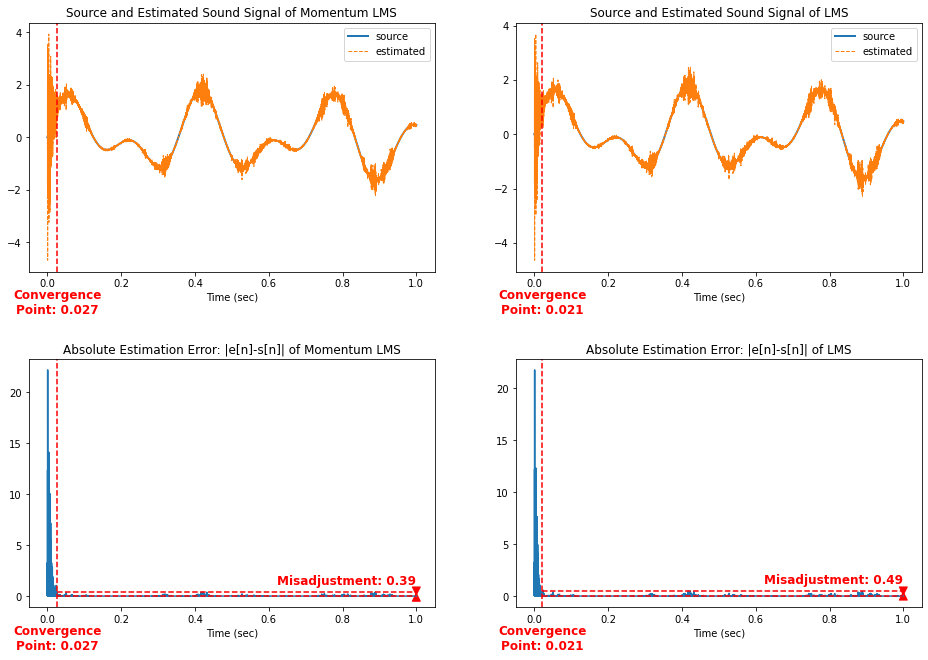

In [55]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_momentum = sb_lms(x, d, mu=0.002, K=5, type="momentum", beta=0.01)
e_LMS = sb_lms(x, d, mu=0.0025, K=5)
plot2methods(t, e_momentum, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Momentum LMS", method_name2="LMS", save=True, savedfname="../figures/MomentumLMSvsLMS", ylim=False)


Converged Point: 	 0.02507936507936508 sec
Converged Point: 	 0.021315192743764172 sec
Max Misadjustment: 	 1.2594491912072625
Max Misadjustment: 	 0.7030625709022315


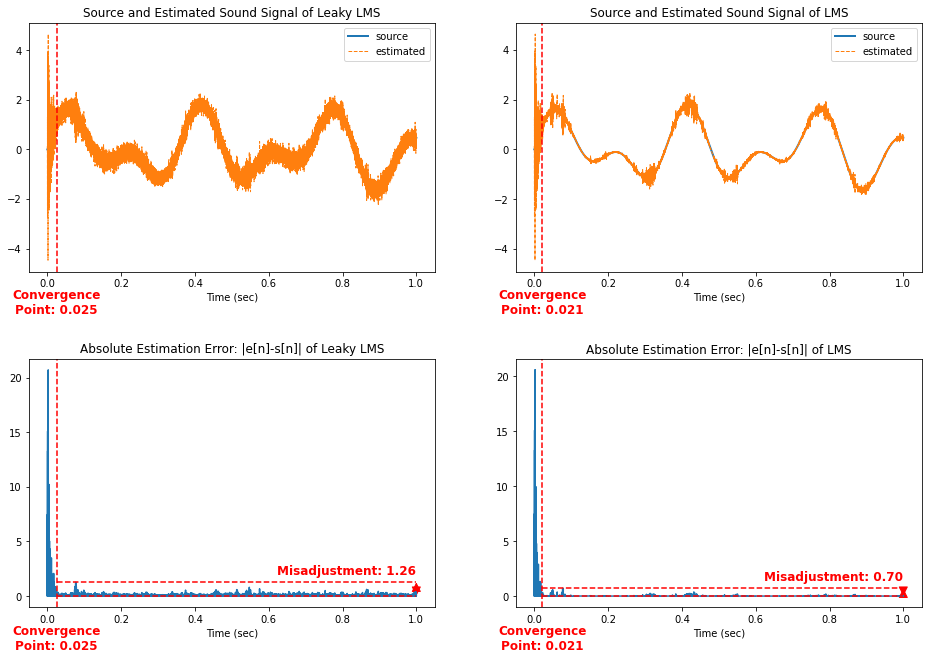

In [62]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_LLMS = sb_lms(x, d, mu=0.0025, K=5, a=0.1)
e_LMS = sb_lms(x, d, mu=0.0025, K=5)
plot2methods(t, e_LLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Leaky LMS", method_name2="LMS", save=True, savedfname="../figures/ComparisonLLMSvsLMS", ylim=False)


Converged Point: 	 0.002380952380952381 sec
Converged Point: 	 0.01746031746031746 sec
Max Misadjustment: 	 0.08399944091385593
Max Misadjustment: 	 1.1737727838043537


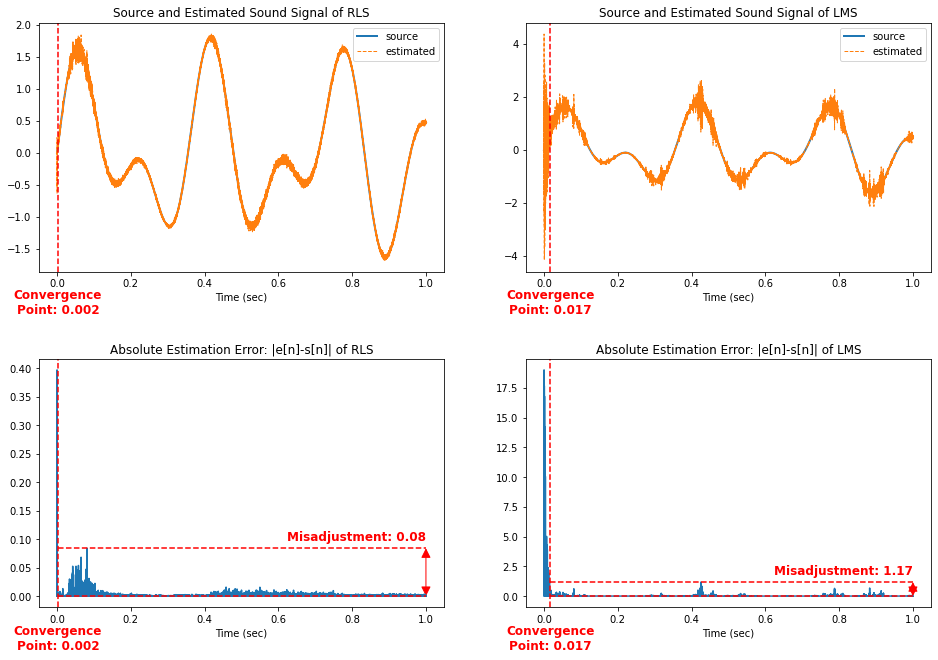

In [63]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_RLS = rls(x, d, mu=1., eps=0.001, K=5)
e_LMS = sb_lms(x, d, mu=0.0025, K=5)
plot2methods(t, e_RLS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="RLS", method_name2="LMS", save=True, savedfname="../figures/ComparisonRLSvsLMS", ylim=False)

Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 63627.56it/s]


Converged Point: 	 0.16578231292517007 sec
Max Misadjustment: 	 0.4649853203373515


Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 60165.43it/s]


Converged Point: 	 0.03111111111111111 sec
Max Misadjustment: 	 1.3082135194013498


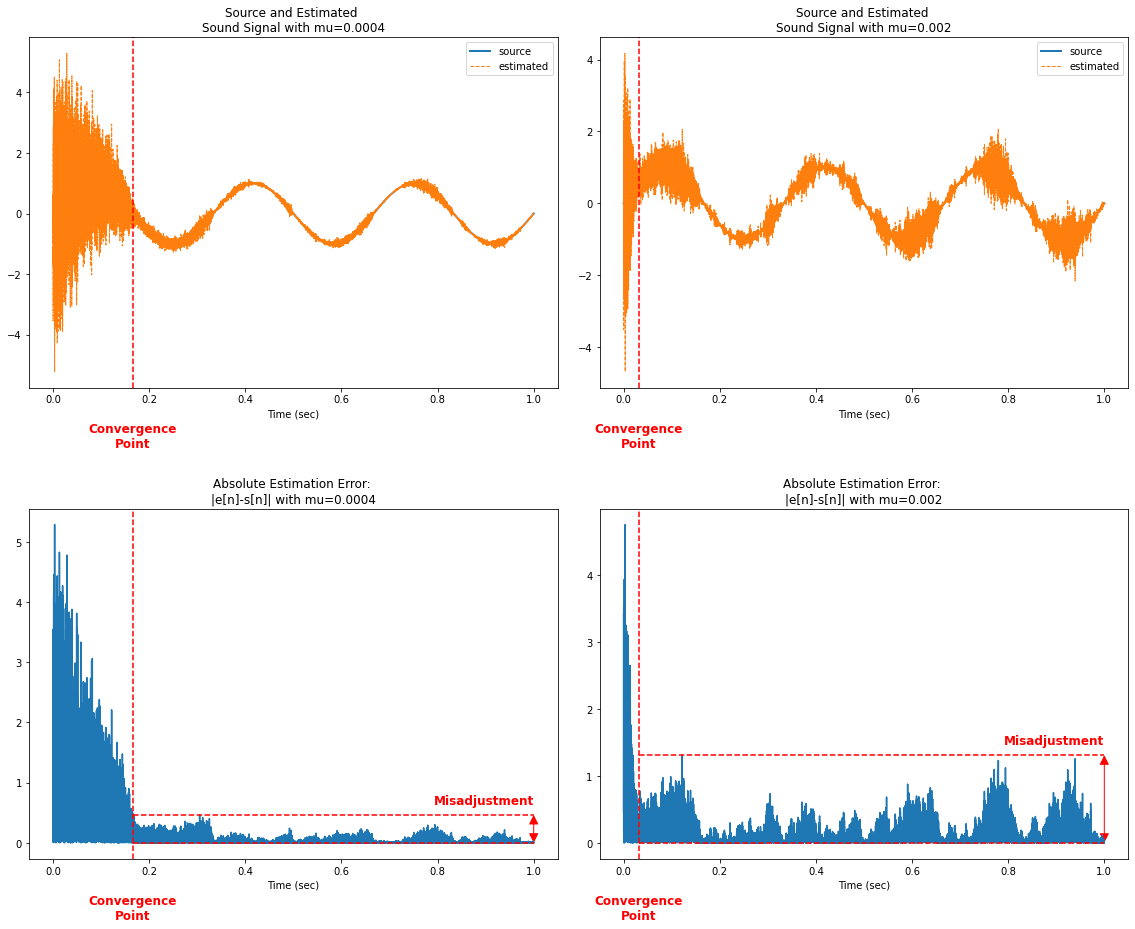

In [1223]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[0.0004, 0.002]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, lms_type="sign-error", mus=mus, conv_div=10)

Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 66189.48it/s]


Converged Point: 	 0.08893424036281179 sec
Max Misadjustment: 	 0.35663827158601735


Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 67447.29it/s]


Converged Point: 	 0.033174603174603176 sec
Max Misadjustment: 	 0.5905862589738773


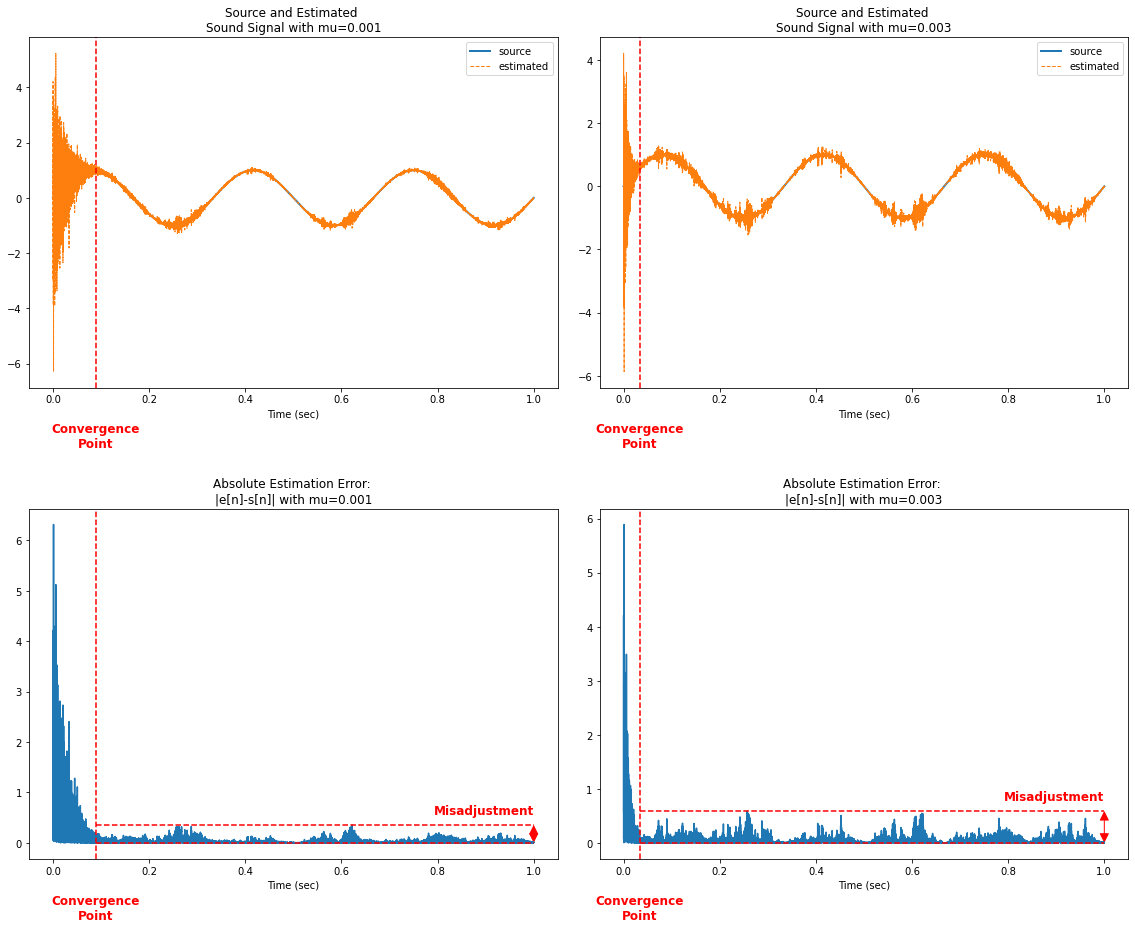

In [1222]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[0.001, 0.003]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, lms_type="sign-data", mus=mus, conv_div=30)

Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 62735.72it/s]


Converged Point: 	 0.32961451247165535 sec
Max Misadjustment: 	 0.23608754523239028


Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 65162.92it/s]


Converged Point: 	 0.16058956916099773 sec
Max Misadjustment: 	 0.7298069957952964


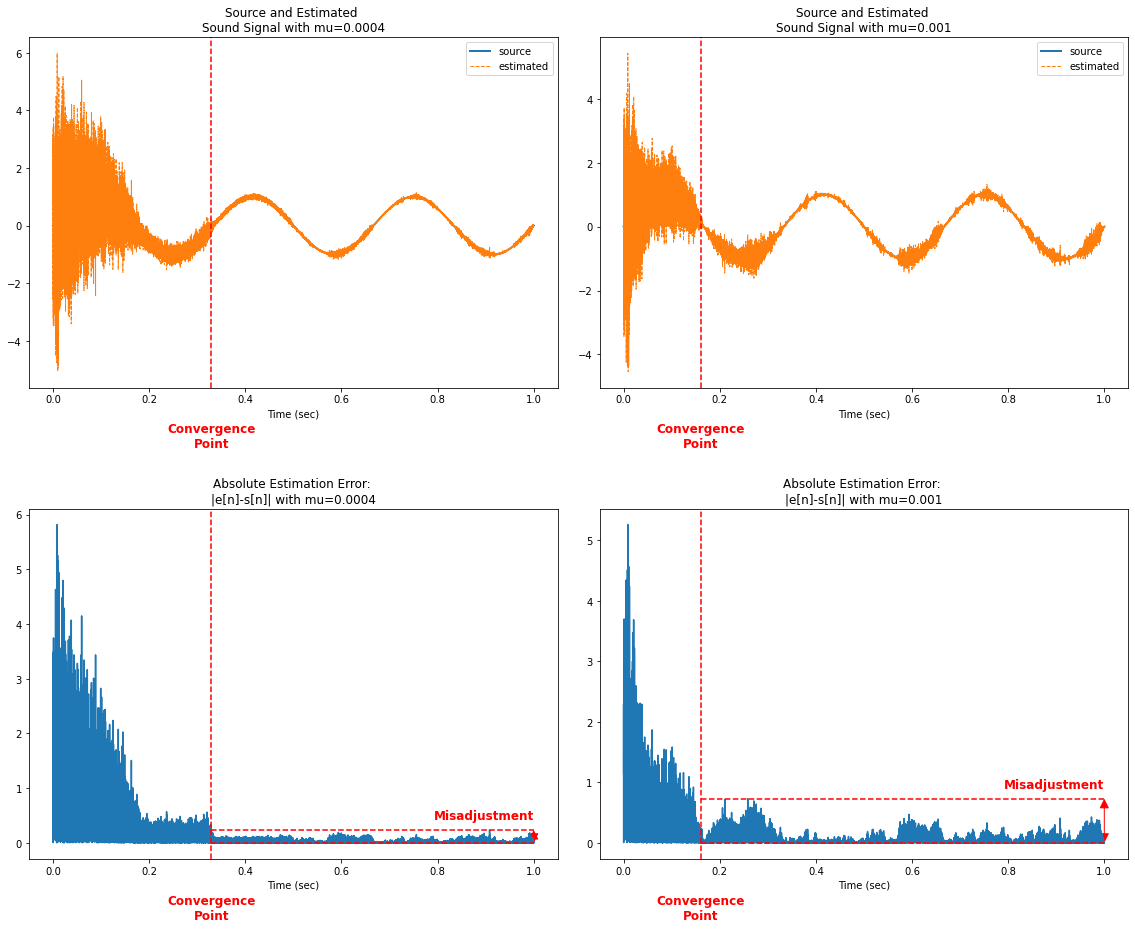

In [1221]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[0.0004, 0.001]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, lms_type="sign-sign", mus=mus, conv_div=20)

### 4. Leaky LMS

Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 68908.27it/s]


Not Converged!


Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 68847.30it/s]


Not Converged!


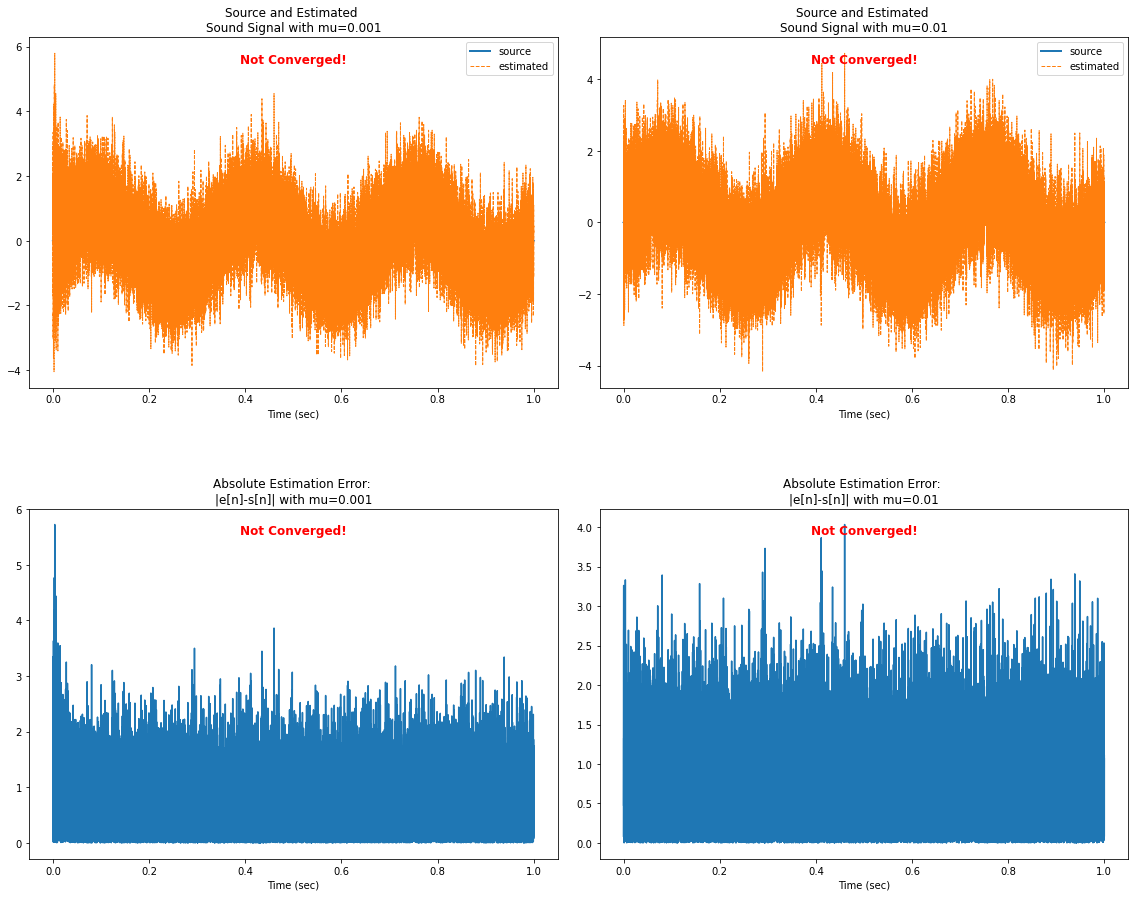

In [1220]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[1e-3, 0.01]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, a=0.9, lms_type="standard", mus=mus, conv_div=20)

Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 73761.63it/s]


Converged Point: 	 0.03732426303854875 sec
Max Misadjustment: 	 0.5653224694145911


Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 75055.78it/s]


Converged Point: 	 0.005464852607709751 sec
Max Misadjustment: 	 1.4259010943740797


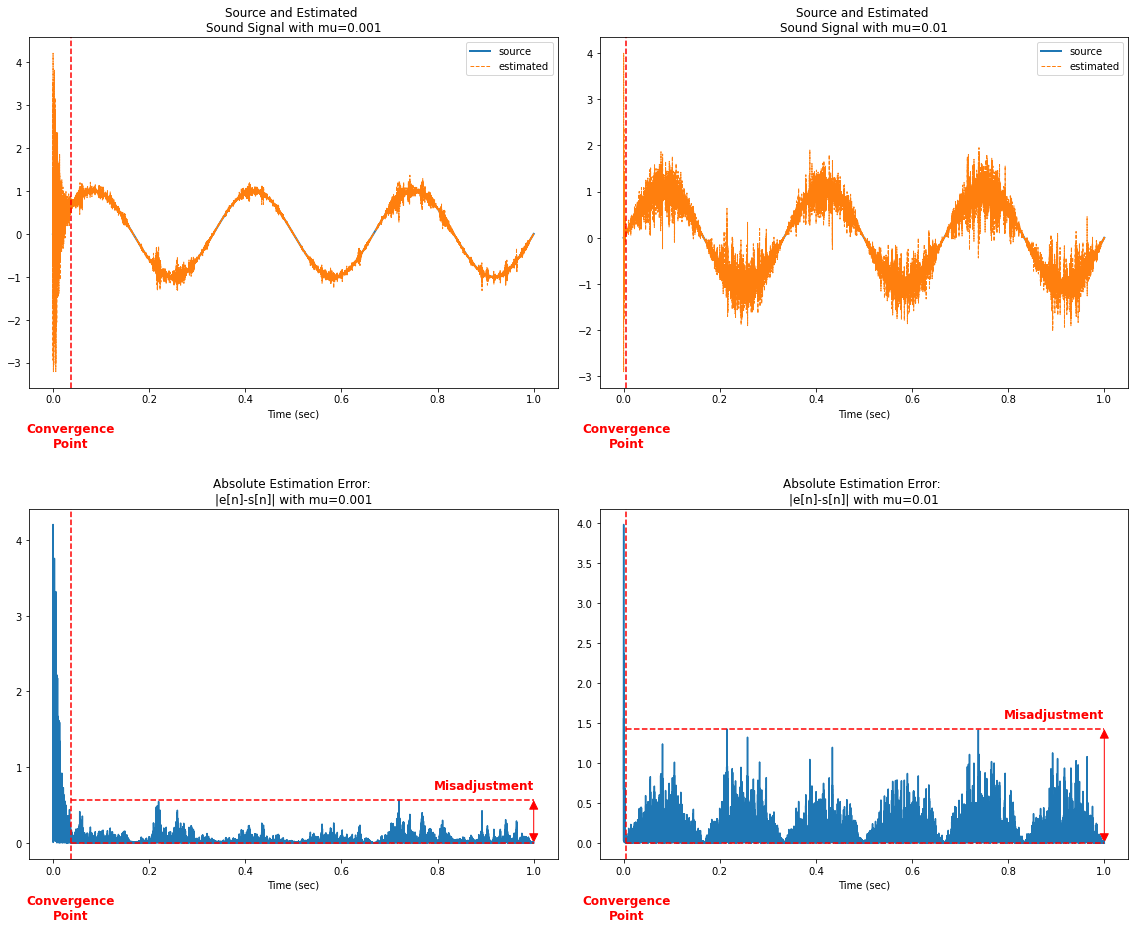

In [1219]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[1e-3, 0.01]
beta = 0.5
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, a=0.9, lms_type="momentum", beta=beta, mus=mus, conv_div=20)

### 5. RLS

Converged Point: 	 0.002403628117913832 sec
Max Misadjustment: 	 0.024658375902525533


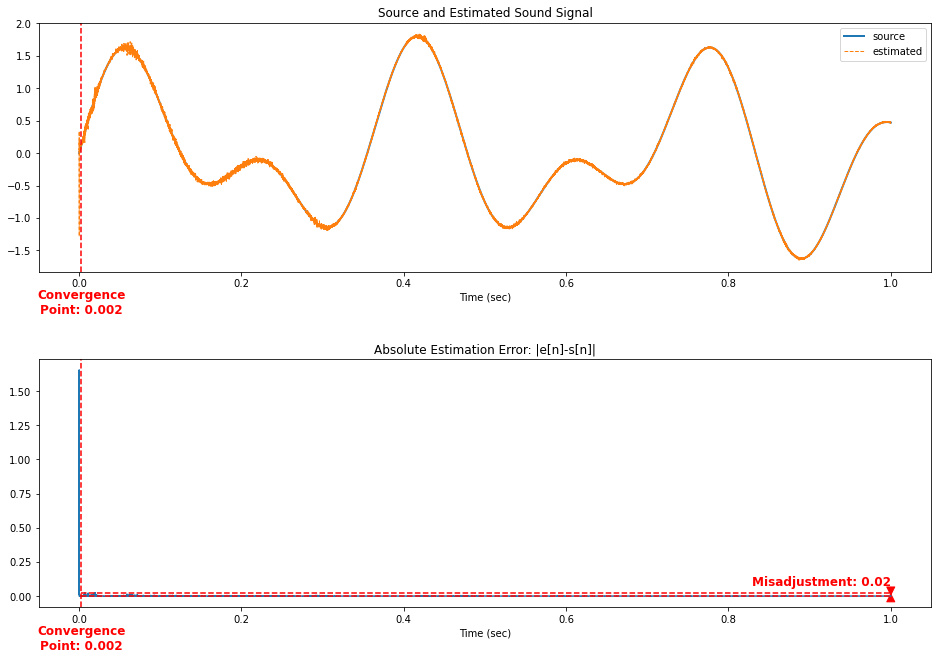

In [439]:
e = rls(x, d, mu=1., eps=0.001, K=5)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100)

## Real Data

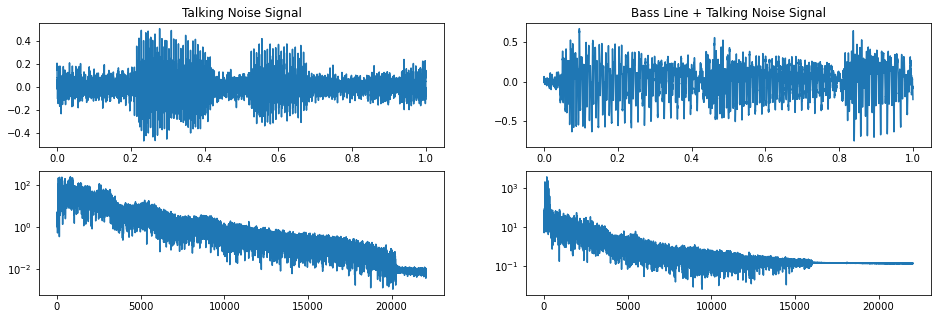

In [440]:
x, fs = sf.read("../data/talkingNoise.wav", dtype = 'float32')
x = x[:,0]
d, fs = sf.read("../data/bassLineTalkingNoise.wav", dtype = 'float32')
d = d[:,0]

T_clip = 1

t1 = np.arange(len(x))/fs
t2 = np.arange(len(d))/fs
fig, axes = plt.subplots(2,2, figsize=(16,5))
axes[0,0].plot(t1[0*fs:int(T_clip*fs)], x[0*fs:int(T_clip*fs)])
axes[0,0].set_title("Talking Noise Signal")
axes[0,1].plot(t2[0*fs:int(T_clip*fs)], d[0*fs:int(T_clip*fs)])
axes[0,1].set_title("Bass Line + Talking Noise Signal")
X = np.abs(np.fft.fft(x[0*fs:int(T_clip*fs)]))
D = np.abs(np.fft.fft(d[0*fs:int(T_clip*fs)]))
axes[1,0].plot(X[0:int(len(X)/2)])
axes[1,1].plot(D[0:int(len(X)/2)])
axes[1,0].set_yscale('log')
axes[1,1].set_yscale('log')
plt.show()
aud1 = ipd.Audio(x[0*fs:int(T_clip*fs)], rate=fs)
aud2 = ipd.Audio(d[0*fs:int(T_clip*fs)], rate=fs)
ipd.display(aud1, aud2)

x:  88200
d:  88200
e:  88200


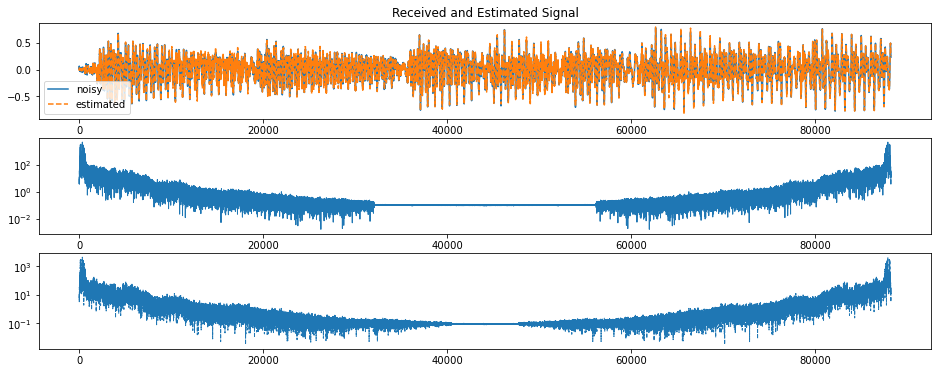

In [457]:
T_test1 = 0
T_test = 2

x = x[int(T_test1*fs):int(T_test*fs)]
d = d[int(T_test1*fs):int(T_test*fs)]

e = rls(x, d, mu=3., eps=0.001, K=100)
#e = sb_lms(x, d, normalized=False, mu=3e-1, K=50)

print("x: ", len(x))
print("d: ", len(d))
print("e: ", len(e))

fig, axes = plt.subplots(3, 1, figsize=(16,6))
axes[0].plot(d, label="noisy")
axes[0].plot(e, '--', label="estimated")
D = np.abs(np.fft.fft(d))
E = np.abs(np.fft.fft(e))
axes[1].plot(D, label="noisy", linewidth="1.0")
axes[2].plot(E, '--', label="estimated", linewidth="1.0")
axes[0].set_title("Estimated Signal")
axes[0].set_title("Received and Estimated Signal")
axes[0].legend()
#axes[1].legend()
axes[1].set_yscale('log')
axes[2].set_yscale('log')
aud1 = ipd.Audio(d, rate=fs)
aud2 = ipd.Audio(e, rate=fs)
ipd.display(aud1, aud2)

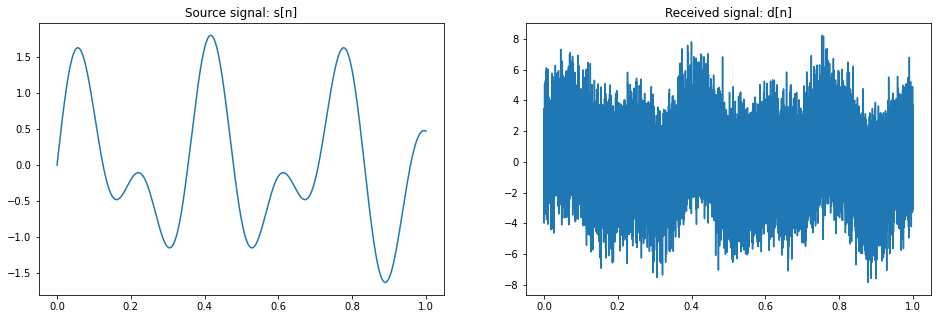

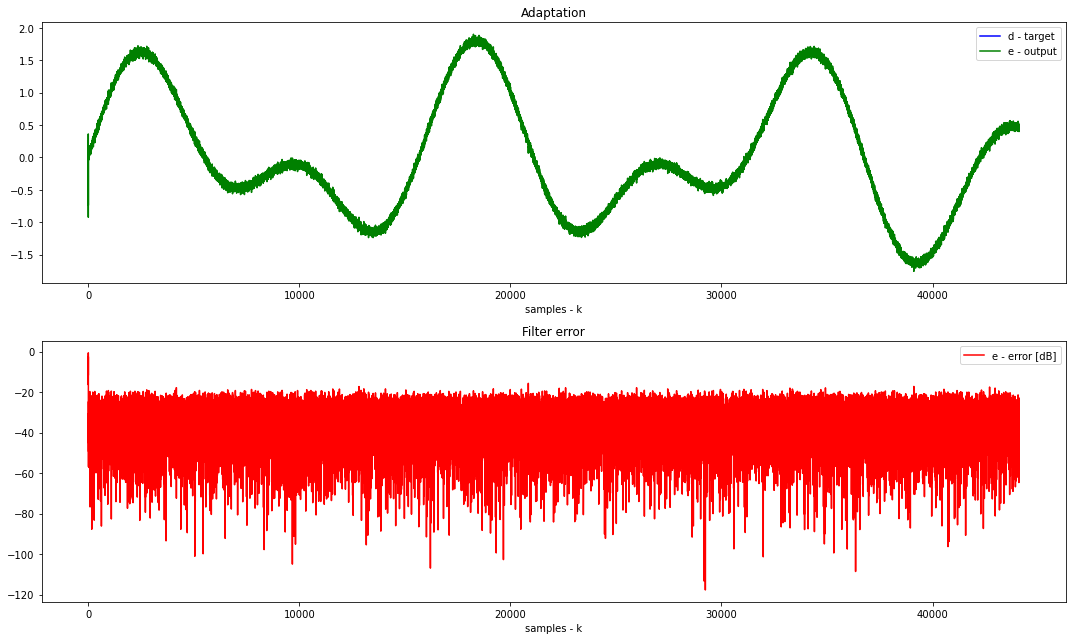

In [435]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))

N = len(x)
K = 5
x_buffer = np.zeros(K)
d_buffer = np.zeros(K)
e = np.zeros(N)

log_d = np.zeros(N)
log_y = np.zeros(N)

filt = pa.filters.FilterRLS(5, mu=2., eps=0.001)

for k in range(N):
    # measure input
    x_buffer = np.r_[x[k], x_buffer[:-1]]
    # predict new value
    e[k] = d[k] - filt.predict(x_buffer)
    # update filter
    filt.adapt(d[k], x_buffer)

### show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(s,"b", label="d - target")
plt.plot(e,"g", label="e - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10((s-e)**2),"r", label="e - error [dB]")
plt.legend(); plt.tight_layout(); plt.show()